In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

np.random.seed(3)
tf.random.set_seed(3)

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')/255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')/255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Epoch 1/30
300/300 [==============================] - 57s 190ms/step - loss: 0.2707 - accuracy: 0.9180 - val_loss: 0.0525 - val_accuracy: 0.9834
Epoch 2/30
300/300 [==============================] - 56s 187ms/step - loss: 0.0888 - accuracy: 0.9738 - val_loss: 0.0395 - val_accuracy: 0.9870
Epoch 3/30
300/300 [==============================] - 56s 187ms/step - loss: 0.0667 - accuracy: 0.9797 - val_loss: 0.0340 - val_accuracy: 0.9876
Epoch 4/30
300/300 [==============================] - 55s 183ms/step - loss: 0.0548 - accuracy: 0.9833 - val_loss: 0.0313 - val_accuracy: 0.9899
Epoch 5/30
300/300 [==============================] - 56s 186ms/step - loss: 0.0451 - accuracy: 0.9865 - val_loss: 0.0298 - val_accuracy: 0.9903
Epoch 6/30
300/300 [==============================] - 56s 187ms/step - loss: 0.0417 - accuracy: 0.9869 - val_loss: 0.0282 - val_accuracy: 0.9901
Epoch 7/30
300/300 [==============================] - 57s 191ms/step - loss: 0.0359 - accuracy: 0.9885 - val_loss: 0.0307 - val_ac

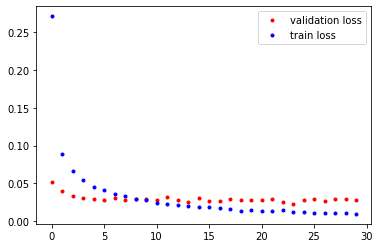

In [2]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

result = model.fit(x_train, y_train,
                   validation_data=(x_test, y_test),
                   epochs=30,
                   batch_size=200)

print('loss & accuracy:',model.evaluate(x_test, y_test))
y_vloss = result.history['val_loss']
y_loss = result.history['loss']
x_len = np.arange((len(y_loss)))
plt.plot(x_len, y_vloss, '.', c='red', label='validation loss')
plt.plot(x_len, y_loss, '.', c='blue', label='train loss')
plt.legend(loc='best')
plt.show()